##### Jun Rui was facing the issue where some problem instances are really hard to converge to 100% accuracy. I'm just testing to see if I get similar results.

In [1]:
import numpy as np
from scipy.linalg import expm
import scipy
import matplotlib.pyplot as plt
import time

In [2]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [3]:
sigmaI = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)
sigmaX = np.array(
    [
        [0, 1],
        [1, 0],
    ]
)
sigmaBin = np.array(
    [
        [0, 0],
        [0, 1],
    ]
)

In [4]:
Values = [3, 9]
Weights = [5, 4]
Ancil = [1, 2, 2]
# correct solution: 10010 or 10001
num_dimension = 2**(len(Values) + len(Ancil))

alpha = 1
beta = 88.2211083047426
gamma = max(Values) + 1
# gamma = 63.74067686081061
T = 1
dt = 0.01
t_axis = np.arange(0, T, dt)[0:]

In [5]:
# Create creation operator
a_dag = np.zeros((num_dimension, num_dimension))
n_indices = np.arange(num_dimension - 1)
a_dag[n_indices + 1, n_indices] = np.sqrt(n_indices + 1)
# print(a_dag)

# Create annihilation operator
a = np.zeros((num_dimension, num_dimension))
n_indices = np.arange(1, num_dimension)
a[n_indices - 1, n_indices] = np.sqrt(n_indices)
# print(a)

# print(a_dag @ a)

In [6]:
H0 = (a_dag + a)
# print(H0)

eigenvals_H0, eigenvecs_H0 = np.linalg.eigh(H0)
ground_idx_H0 = eigenvals_H0.argsort()[0]
print(eigenvals_H0[ground_idx_H0])
print(eigenvecs_H0[:, ground_idx_H0])

-10.077422674229464
[-0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.     0.
 -0.     0.    -0.     0.    -0.001  0.002 -0.004  0.008 -0.014  0.026
 -0.045  0.072 -0.112  0.165 -0.229  0.301 -0.37   0.422 -0.44   0.409
 -0.32   0.177]


In [7]:
eyes = [sigmaI for _ in range(len(Values) + len(Ancil))]
profit_matrix = np.zeros((num_dimension, num_dimension))
weight_matrix = np.zeros((num_dimension, num_dimension))
penalty_matrix = np.zeros((num_dimension, num_dimension))

for i in range(len(Values)):
    nose = eyes.copy()
    nose[i] = sigmaBin
    tensorproduct = nose[0]
    for sigma in nose[1:]:
        tensorproduct = np.kron(tensorproduct, sigma)
    profit_matrix += Values[i] * tensorproduct
    weight_matrix += Weights[i] * tensorproduct
    
for j in range(len(Ancil)):
    nose = eyes.copy()
    nose[j + len(Values)] = sigmaBin
    tensorproduct = nose[0]
    for sigma in nose[1:]:
        tensorproduct = np.kron(tensorproduct, sigma)
    penalty_matrix += Ancil[j] * tensorproduct

Hp = -profit_matrix + gamma * (weight_matrix - penalty_matrix)**2

# for row in Hp:
#     print(row)


eigenvals_Hp, eigenvecs_Hp = np.linalg.eigh(Hp)
print(eigenvals_Hp.argsort())
ground_idx_Hp = eigenvals_Hp.argsort()[0]
ground_idx_Hp_degen = eigenvals_Hp.argsort()[1]
print(eigenvals_Hp[ground_idx_Hp])
print(eigenvecs_Hp[:, ground_idx_Hp])
print(eigenvals_Hp[ground_idx_Hp_degen])
print(eigenvecs_Hp[:, ground_idx_Hp_degen])



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 15 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
-9.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
-3.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
def H(t, T=1, alpha=1, beta=1):
    return alpha * ( (1 - t/T)*beta*H0 + (t/T)*Hp )

In [9]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
# print(psi_ini)
# print(np.linalg.norm(psi_ini))

psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
if eigenvals_Hp[ground_idx_Hp] == eigenvals_Hp[ground_idx_Hp_degen]:
    psi_correct_degen = eigenvecs_Hp[:, ground_idx_Hp_degen]
else:    
    psi_correct_degen = np.zeros(eigenvecs_Hp[:, ground_idx_Hp_degen].shape)
print(psi_correct)
print(psi_correct_degen)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# alpha_list = np.arange(0, 100, 1)
# alpha_list = np.power(10, np.arange(0, 6, 1))
# alpha = 26.34314250004425
# alpha_list = [alpha]
# print(alpha_list)
alpha = 1
beta = 1
T = 1
# print(alpha_list)
accuracy_list = []
# T_list = np.arange(0, 100, 1)
T_list = np.power(1.5, np.arange(0, 30, 1))

for T in T_list:
    start_time = time.time()

    t_axis = np.arange(0, T, dt)
    junrui_unitary = np.identity(len(H0))
    for t in t_axis:
        junrui_unitary = expm(-1j * H(t, alpha=alpha, beta=beta, T=T) * dt) @ junrui_unitary

    psi_final = junrui_unitary @ psi_ini

    accuracy = np.abs( np.dot(psi_correct, psi_final) )**2 + np.abs( np.dot(psi_correct_degen, psi_final) )**2
    accuracy_list.append(accuracy)

    end_time = time.time()
    print(f"T = {T}, loop time: {end_time - start_time}, accuracy: {accuracy}")

print(accuracy_list)
# plt.scatter(alpha_list, accuracy_list, s=1)
plt.scatter(T_list, accuracy_list, s=1)
plt.xlabel("T")
plt.ylabel("accuracy")
print(max(accuracy_list))

T = 1.0, loop time: 0.23646903038024902, accuracy: 3.81423129558523e-09
T = 1.5, loop time: 0.06844592094421387, accuracy: 6.799587844079633e-09
T = 2.25, loop time: 0.20838308334350586, accuracy: 5.63798656702189e-08
T = 3.375, loop time: 0.4686300754547119, accuracy: 3.0032901092196974e-07
T = 5.0625, loop time: 0.3316309452056885, accuracy: 9.601871935722025e-07
T = 7.59375, loop time: 0.693666934967041, accuracy: 1.4575553388389501e-06
T = 11.390625, loop time: 0.8723599910736084, accuracy: 2.3746638354263242e-07
T = 17.0859375, loop time: 1.2181479930877686, accuracy: 8.516079520142442e-06
T = 25.62890625, loop time: 2.4447553157806396, accuracy: 0.0001459128864696656
T = 38.443359375, loop time: 3.1622300148010254, accuracy: 0.0004754676010523347
T = 57.6650390625, loop time: 4.786318063735962, accuracy: 0.0036491867349663625
T = 86.49755859375, loop time: 8.539182186126709, accuracy: 0.0018306387395097441
T = 129.746337890625, loop time: 5.857827663421631, accuracy: 0.0440782168

0.9672258490864737


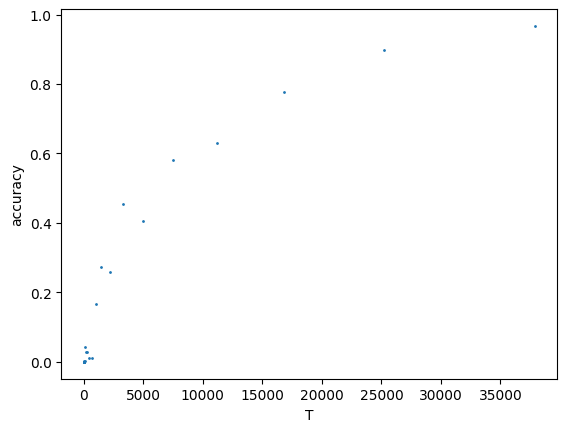

In [12]:
plt.scatter(T_list[0:len(accuracy_list)], accuracy_list, s=1)
plt.xlabel("T")
plt.ylabel("accuracy")
print(max(accuracy_list))

In [ ]:
# alpha_list = np.arange(0, 100, 1)
# alpha_list = np.power(10, np.arange(0, 6, 1))
# alpha = 26.34314250004425
# alpha_list = [alpha]
# print(alpha_list)
# alpha = 1
# beta = 1
# T = 1
# # print(alpha_list)
# accuracy_list = []
# T_list = np.arange(0, 100, 1)

# for alpha in alpha_list:
#     start_time = time.time()

#     junrui_unitary = np.identity(len(H0))
#     for t in t_axis:
#         junrui_unitary = expm(-1j * H(t, alpha=alpha, beta=beta, T=T) * dt) @ junrui_unitary

#     psi_final = junrui_unitary @ psi_ini

#     accuracy = np.abs( np.dot(psi_correct, psi_final) )**2
#     accuracy_list.append(accuracy)

#     end_time = time.time()
#     # print(f"alpha = {alpha}, loop time: {end_time - start_time}")

# print(accuracy_list)
# plt.scatter(alpha_list, accuracy_list, s=1)
# plt.xlabel("alpha")
# plt.ylabel("accuracy")
# print(max(accuracy_list))

In [ ]:
print(gamma)

10


In [ ]:
print(beta)

1


In [ ]:
print(alpha)

1


In [ ]:
abs(psi_final[17])**2 + abs(psi_final[18])**2

np.float64(3.51386302583266e-05)